In [8]:
from jupyterthemes import get_themes
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme('monokai')

In [9]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings 
warnings.filterwarnings('ignore')

In [10]:
def read_data():
    all_data = pd.read_csv("HR_comma_sep.csv")
    all_data["ID"] = all_data.index
    all_data1  = all_data.pop("ID")
    all_data.insert(0, "ID", all_data1)
    return all_data
data = read_data()
data

,ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0,0.38,0.53,2,157,3,0,1,0,sales,low
1,1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,3,0.72,0.87,5,223,5,0,1,0,sales,low
4,4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...,...
14994,14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,14997,0.11,0.96,6,280,4,0,1,0,support,low


In [11]:
def exploration_data(data):
    print(f"Shape of Data: {data.shape}\n\nInfo about the Data:\n")
    print(f"{data.info()}\n\nColumns:\n")
    print(f"{data.columns}\n\nDescribe of the Data:\n")
    print(f"{data.describe()}\n\nLast evaluations 50  employees:\n")
    print(f"{data.pivot(index = 'ID', columns='salary', values='last_evaluation').head(20)}")
exploration = exploration_data(data)
exploration

Shape of Data: (14999, 11)

Info about the Data:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     14999 non-null  int64  
 1   satisfaction_level     14999 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  int64  
 4   average_montly_hours   14999 non-null  int64  
 5   time_spend_company     14999 non-null  int64  
 6   Work_accident          14999 non-null  int64  
 7   left                   14999 non-null  int64  
 8   promotion_last_5years  14999 non-null  int64  
 9   Department             14999 non-null  object 
 10  salary                 14999 non-null  object 
dtypes: float64(2), int64(7), object(2)
memory usage: 1.3+ MB
None

Columns:

Index(['ID', 'satisfaction_level', 'last_evaluation', 'number_project',
       'average

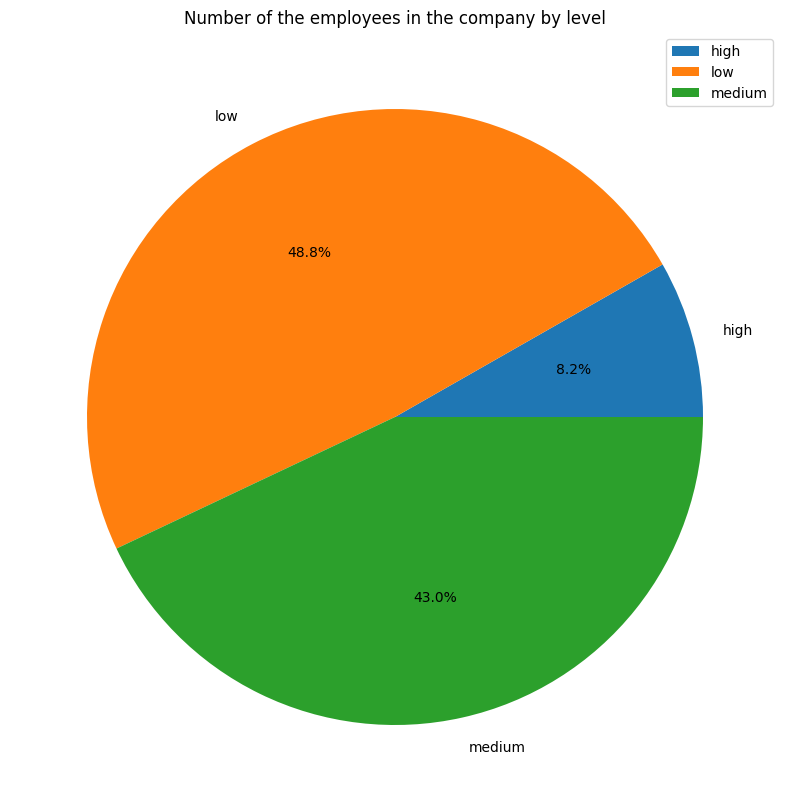

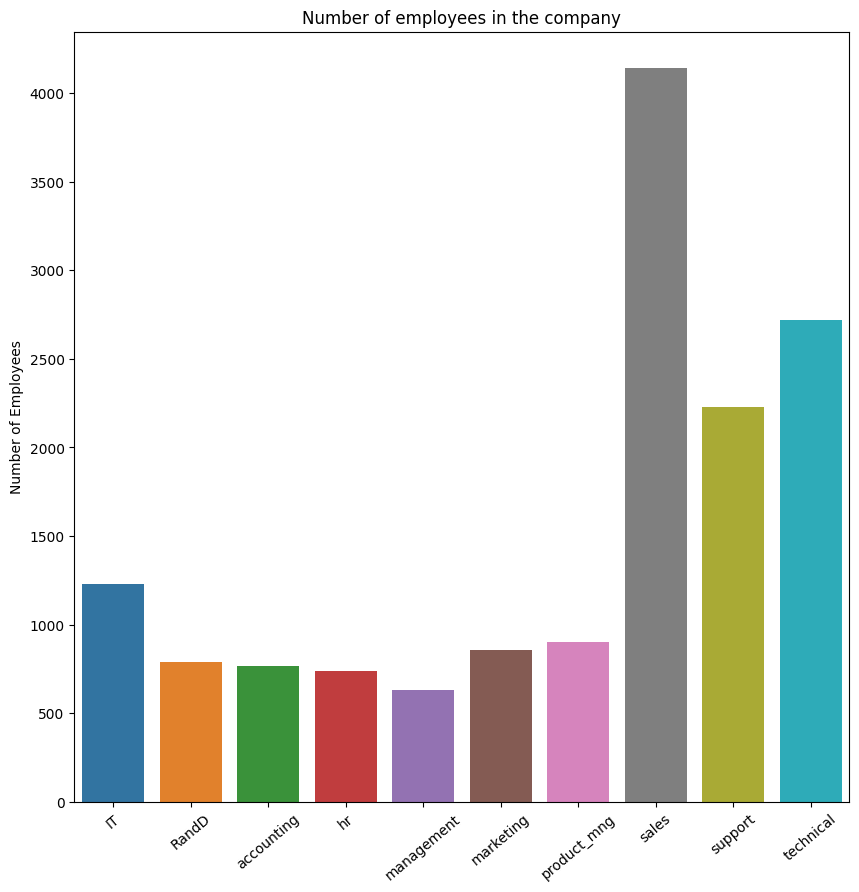

In [12]:
def data_analysis(data):
    g = data.groupby(["salary"]).count()
    just_data = g["ID"].values
    for_labels = g.index.values
    plt.figure(figsize=(10, 10))
    plt.pie(just_data, labels=for_labels, autopct='%1.1f%%')
    plt.title("Number of the employees in the company by level")
    plt.legend()
    plt.show()
    departments = data.groupby(data["Department"]).count()
    data1 = departments["ID"]
    label = data1.index.values
    plt.figure(figsize=(10, 10))
    sns.barplot(data=departments, x=label, y=data1)
    plt.title("Number of employees in the company")
    plt.xticks(rotation=40)
    plt.ylabel("Number of Employees")
    plt.show()

first_analyse = data_analysis(data)
first_analyse

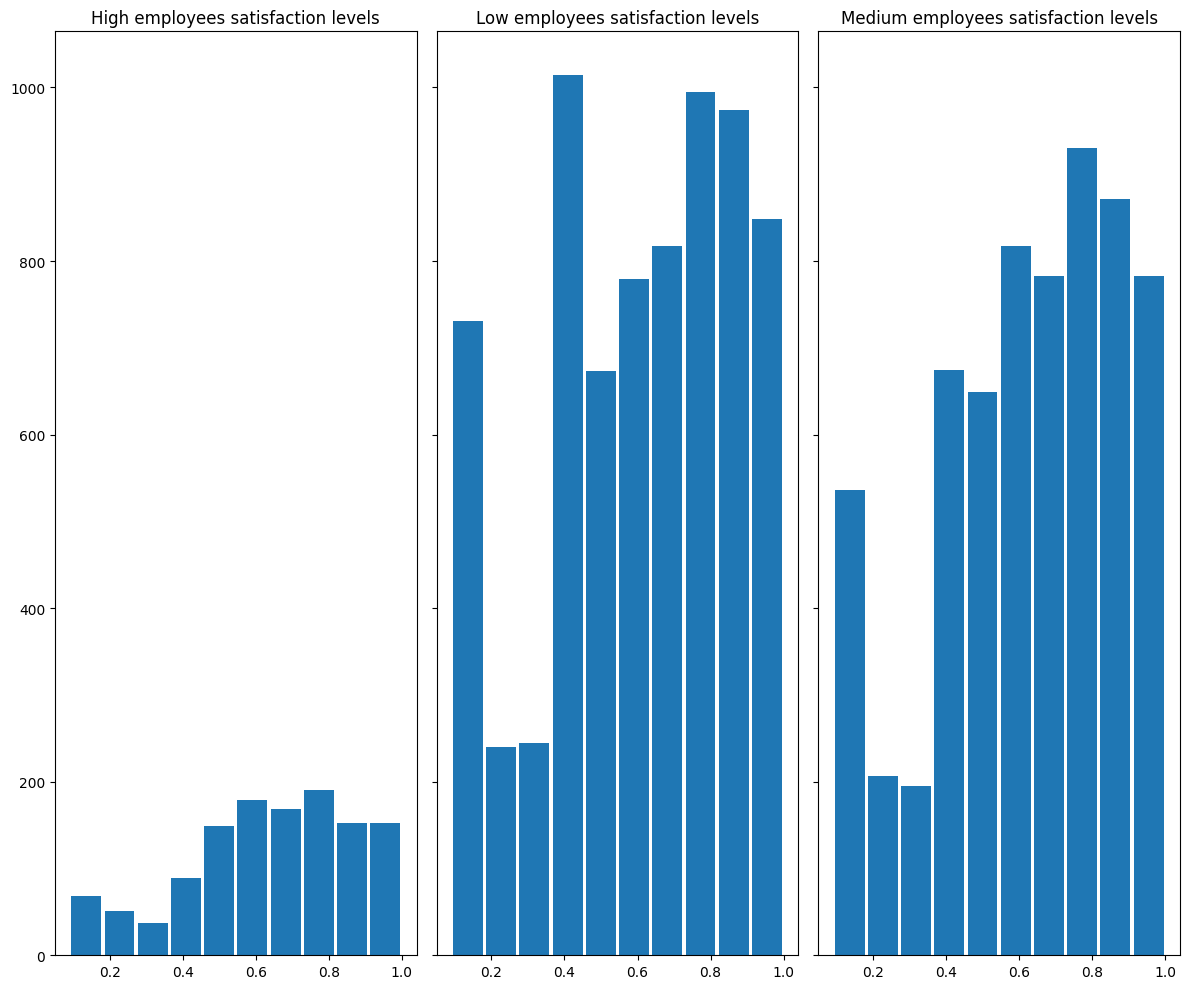

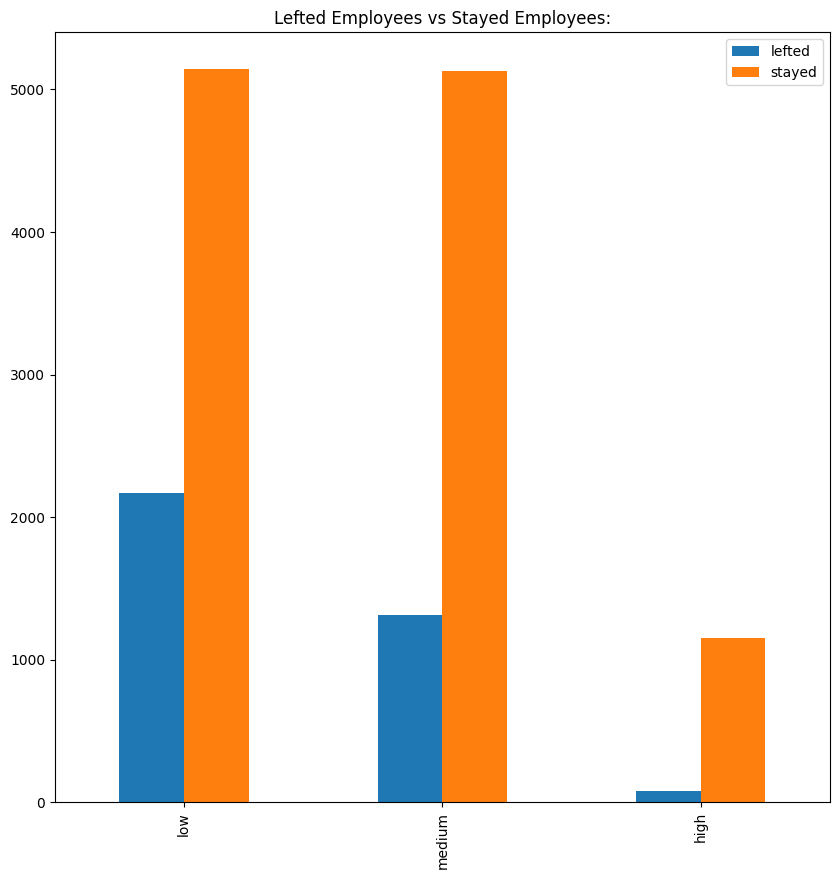

In [13]:
def data_analyse2(data):
    just_c = data.pivot(index='ID', columns='salary', values='satisfaction_level')
    fig_subplot_y = just_c["high"]
    fig_subplot_y1 = just_c["low"]
    fig_subplot_y2 = just_c["medium"]
    fig, axs = plt.subplots(1, 3, sharey=True, tight_layout=True, figsize=(12, 10))
    axs[0].hist(fig_subplot_y, rwidth=0.9)
    axs[0].set_title("High employees satisfaction levels")
    axs[1].hist(fig_subplot_y1, rwidth=0.9)
    axs[1].set_title("Low employees satisfaction levels")
    axs[2].hist(fig_subplot_y2,rwidth=0.9)
    axs[2].set_title("Medium employees satisfaction levels")
    plt.show()
    data_left = data[(data["left"]) > 0]
    data_stayed = data[(data["left"]) == 0]
    just_left = data_left["salary"].value_counts()
    just_stayed = data_stayed["salary"].value_counts()
    stayed = pd.DataFrame(just_stayed)
    left = pd.DataFrame(just_left)
    left.rename(columns={"salary":"lefted"}, inplace=True)
    stayed.rename(columns={"salary":"stayed"}, inplace = True)
    all_v = pd.concat([left, stayed], axis=1)
    all_v.plot.bar(title="Lefted Employees vs Stayed Employees:", figsize=(10, 10))
    plt.show()
second_analyse = data_analyse2(data)
second_analyse


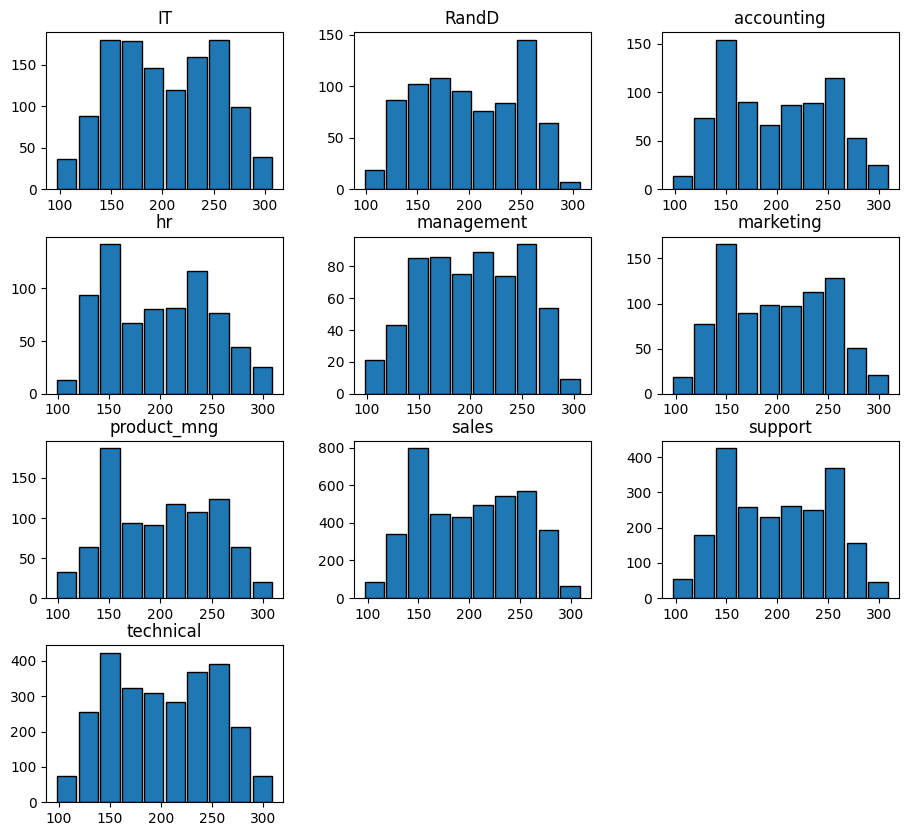

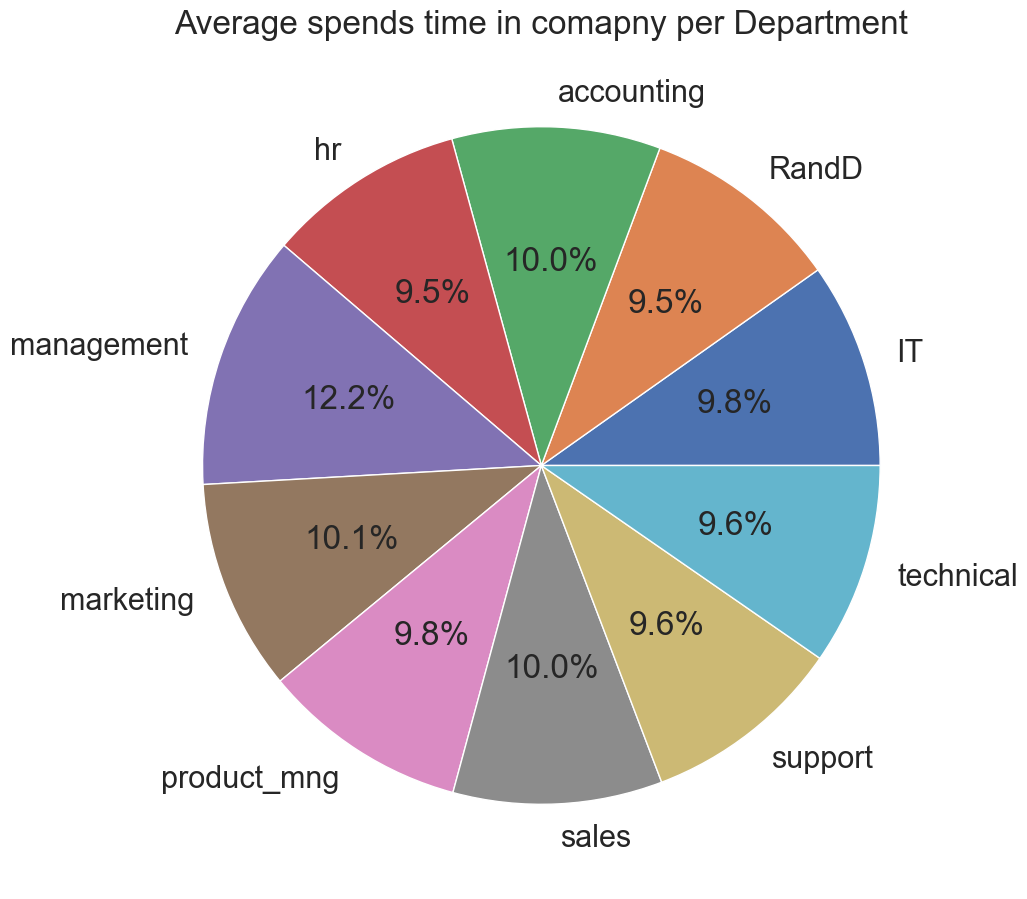

In [14]:
def data_analyse3(data):
    month = data.pivot(index="ID", columns="Department", values="average_montly_hours")
    month.hist(grid=False, figsize=(11, 10), rwidth=0.9, edgecolor="black")
    plt.show() # Here i have vizualized average hours monthly per Departments
    time = data.groupby(["Department"]).mean()
    sns.set(font_scale=2)
    plt.figure(figsize=(14, 11))
    plt.pie(time["time_spend_company"], labels=time.index, autopct="%1.1f%%")
    plt.title("Average spends time in comapny per Department")
    plt.xticks(rotation=35)
    plt.show()
third_analyse = data_analyse3(data)
third_analyse

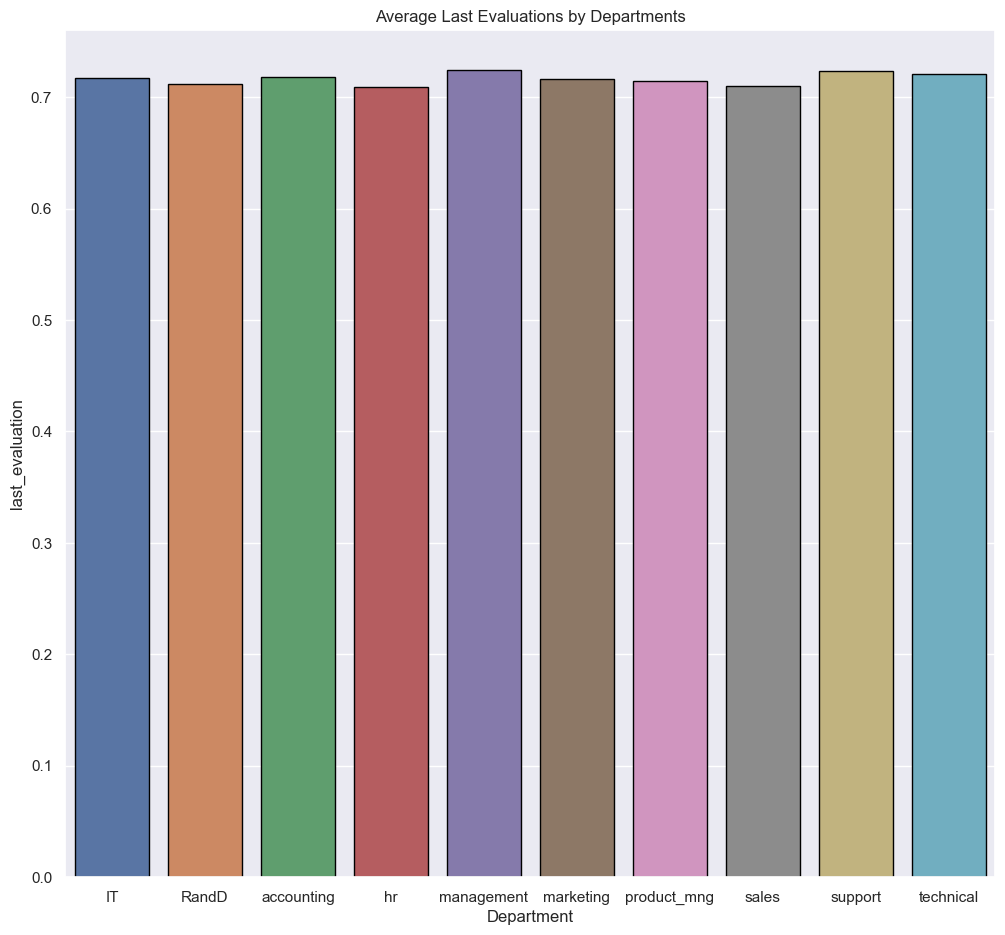

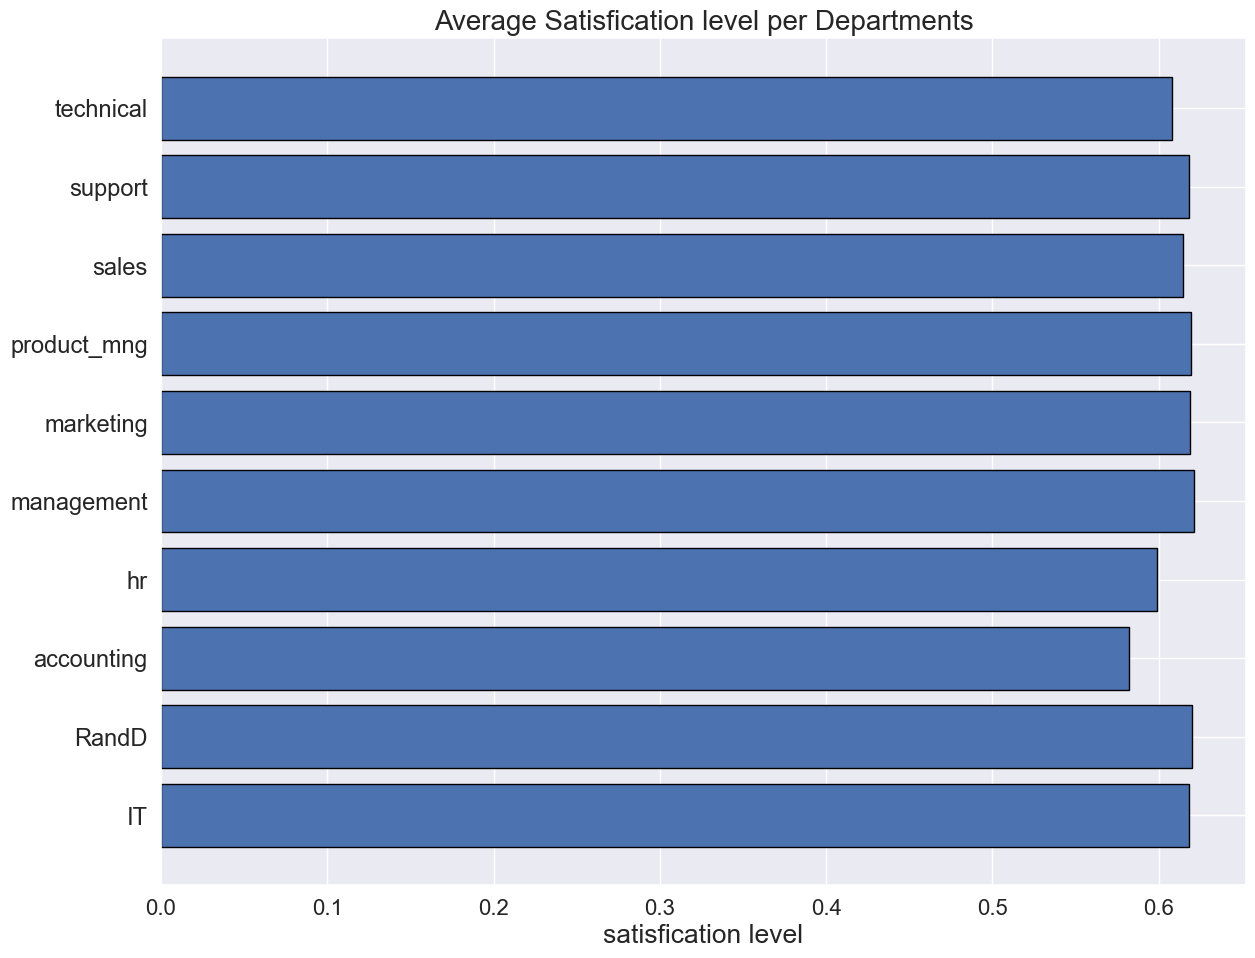

In [15]:
def data_analyse4(data):
    sns.set(font_scale=1)
    plt.figure(figsize=(12, 11))
    last_mean = data.groupby(["Department"]).mean()
    sns.barplot(data=last_mean, x=last_mean.index, y=last_mean["last_evaluation"], edgecolor="black")
    plt.title("Average Last Evaluations by Departments")
    plt.show()
    sat = data.groupby(by=["Department"]).mean()
    figure = plt.figure(figsize=(14, 11))
    for_x = [i for i in sat["satisfaction_level"]]
    for_y = [i for i in sat.index]
    plt.barh(for_y, for_x, edgecolor="black")
    plt.title("Average Satisfication level per Departments", fontsize=20)
    plt.xlabel("satisfication level", fontsize=19)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=17)
    plt.show()
fourth_analyse = data_analyse4(data)
fourth_analyse

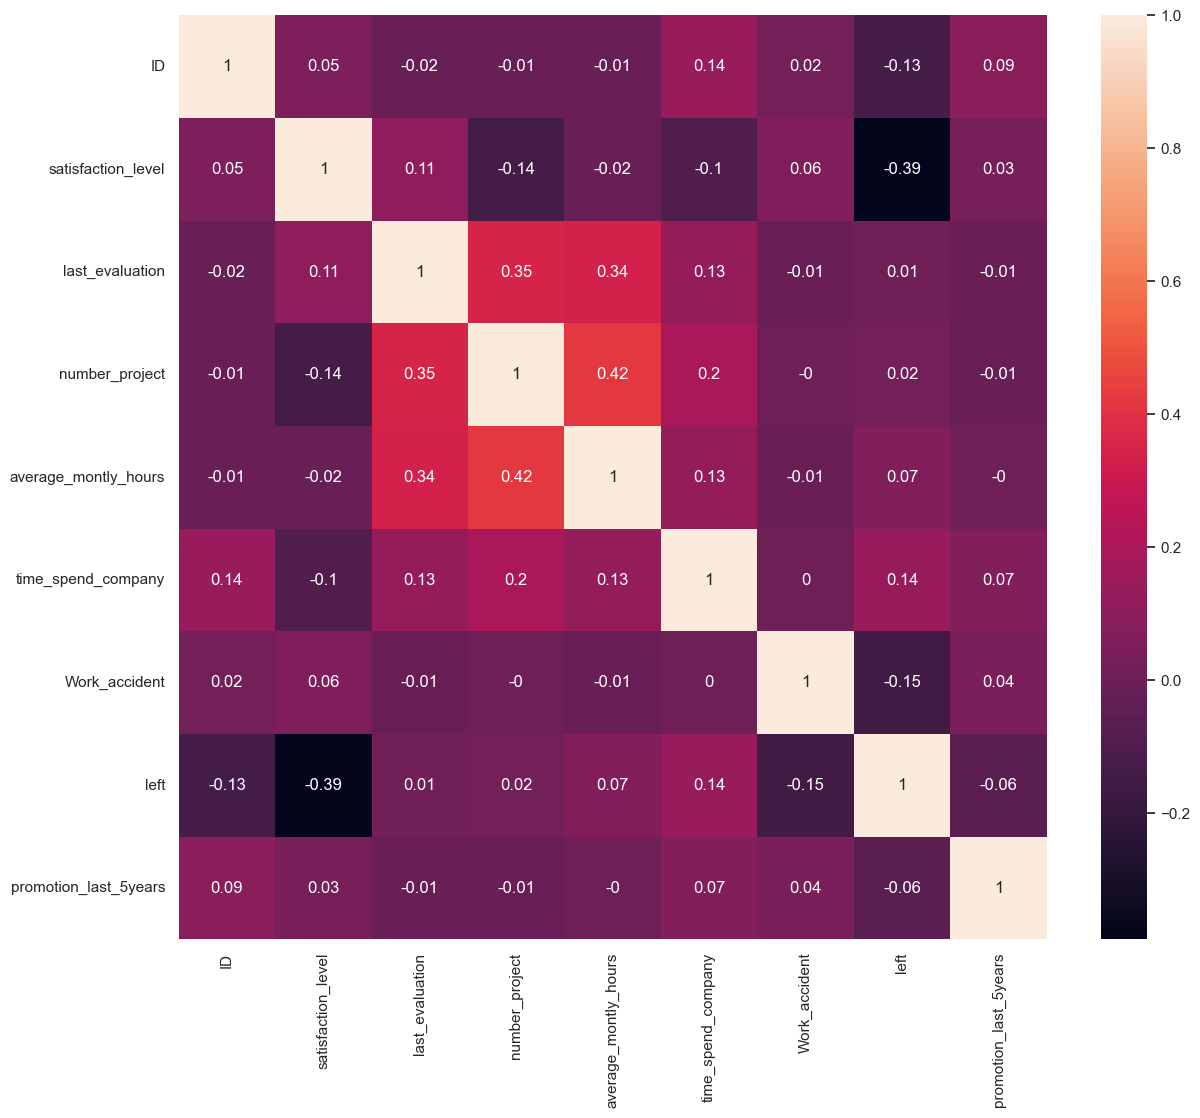

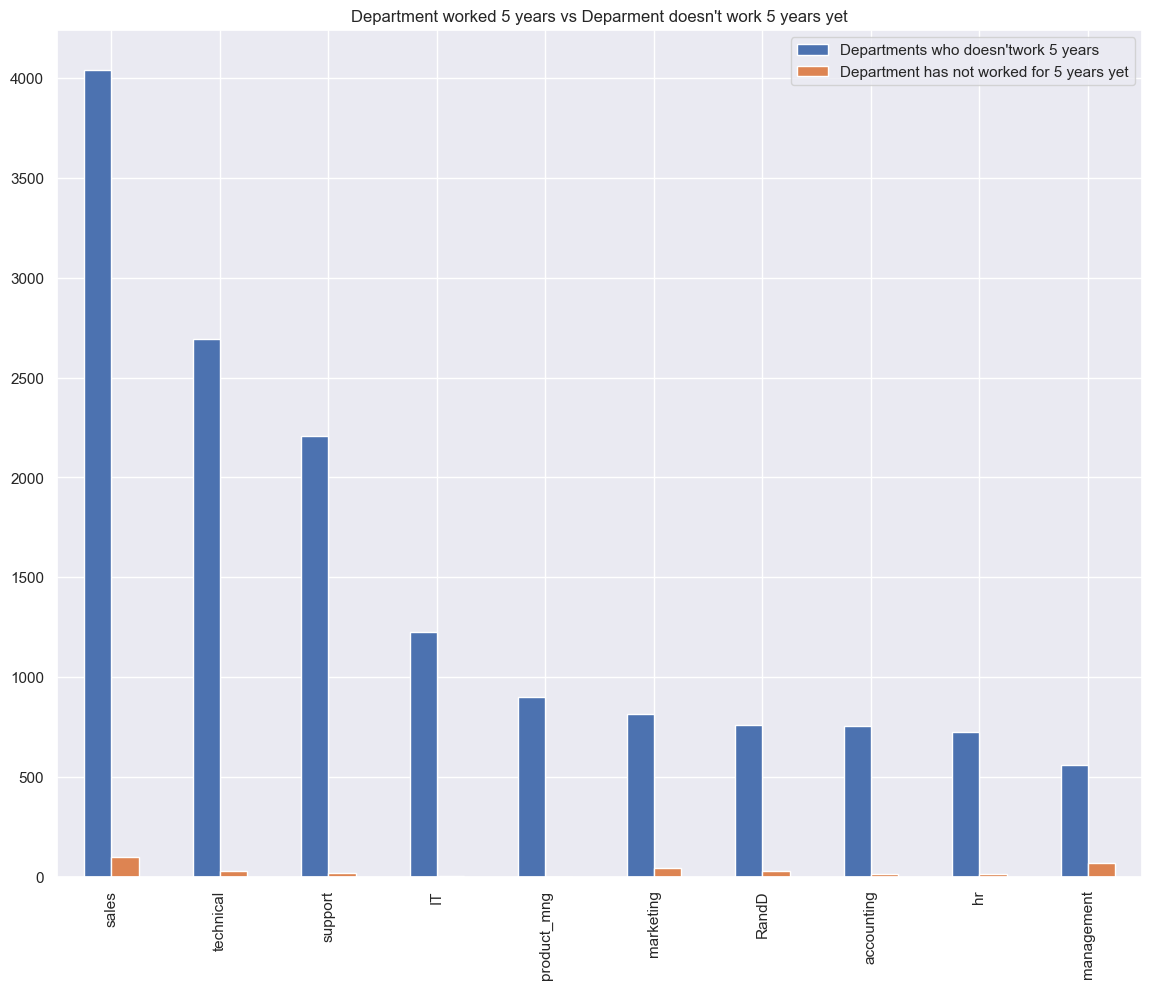

In [16]:
def data_analyse5(data):
    just_choose = data[["Department", "salary"]]
    corrmat = data.corr()
    just_take = round(corrmat, 2)
    plt.figure(figsize=(14, 12))
    sns.heatmap(just_take,annot=True)
    plt.show()
    years_5true = data[(data["promotion_last_5years"])>0]
    years_5false = data[(data["promotion_last_5years"]) == 0]
    true = years_5true["Department"].value_counts()
    false = years_5false["Department"].value_counts()
    false1 = pd.DataFrame(false)
    false_all = false1.rename(columns={"Department":"Departments who doesn'twork 5 years"})
    true1 = pd.DataFrame(true)
    true_all = true1.rename(columns={"Department":"Department has not worked for 5 years yet"})
    all_res = pd.concat([false_all, true_all], axis=1)
    all_res.plot.bar(title="Department worked 5 years vs Deparment doesn't work 5 years yet", figsize=(14, 11))
    plt.show()
fiveth = data_analyse5(data)
fiveth

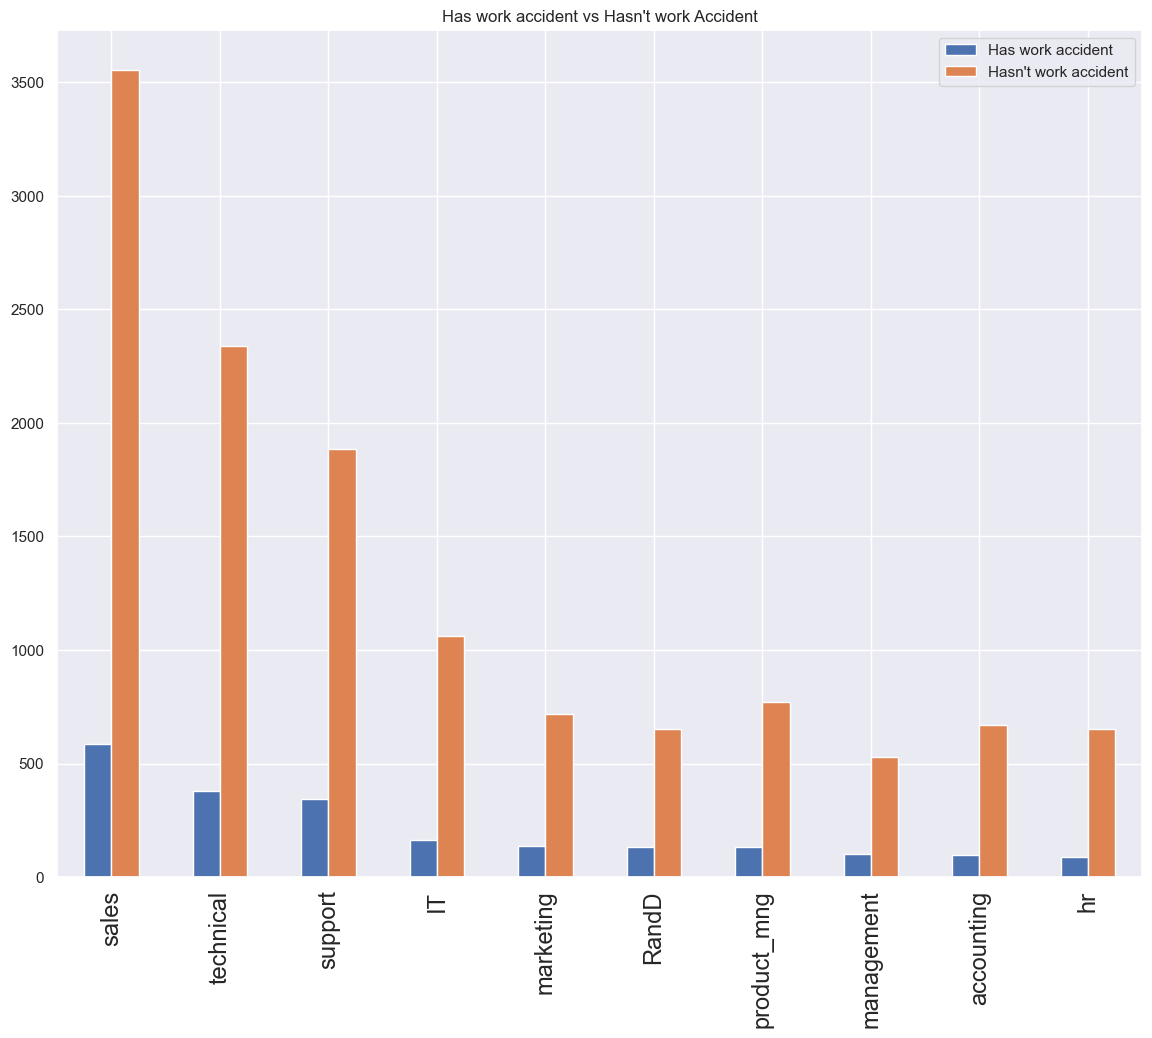

In [17]:
def data_analyse6(data):
    has_work_accident = data[(data["Work_accident"])>0]
    hasnt_work_accident = data[(data["Work_accident"]) == 0]
    has_work_accident1 = pd.DataFrame(has_work_accident["Department"].value_counts()).rename(columns={"Department":"Has work accident"})
    hasnt_work_accident1 = pd.DataFrame(hasnt_work_accident["Department"].value_counts()).rename(columns={"Department":"Hasn't work accident"})
    all_information = pd.concat([has_work_accident1, hasnt_work_accident1], axis=1)
    all_information.plot.bar(title="Has work accident vs Hasn't work Accident", figsize=(14, 11))
    plt.xticks(fontsize=17)
    plt.show()
sixth = data_analyse6(data)
sixth

From the company is going to leave: 11.43%
In the company is going to stay: 88.57% 
accuracy of the predict: 0.782


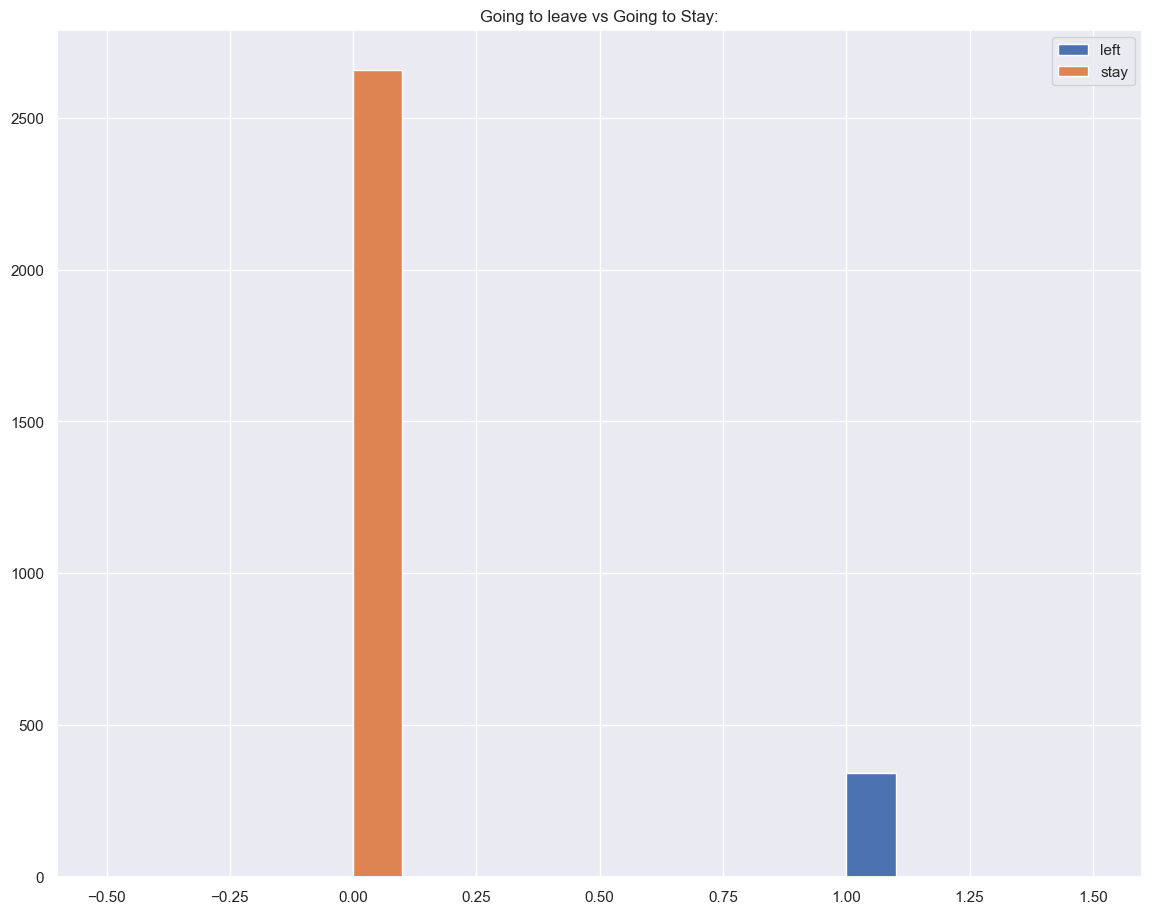

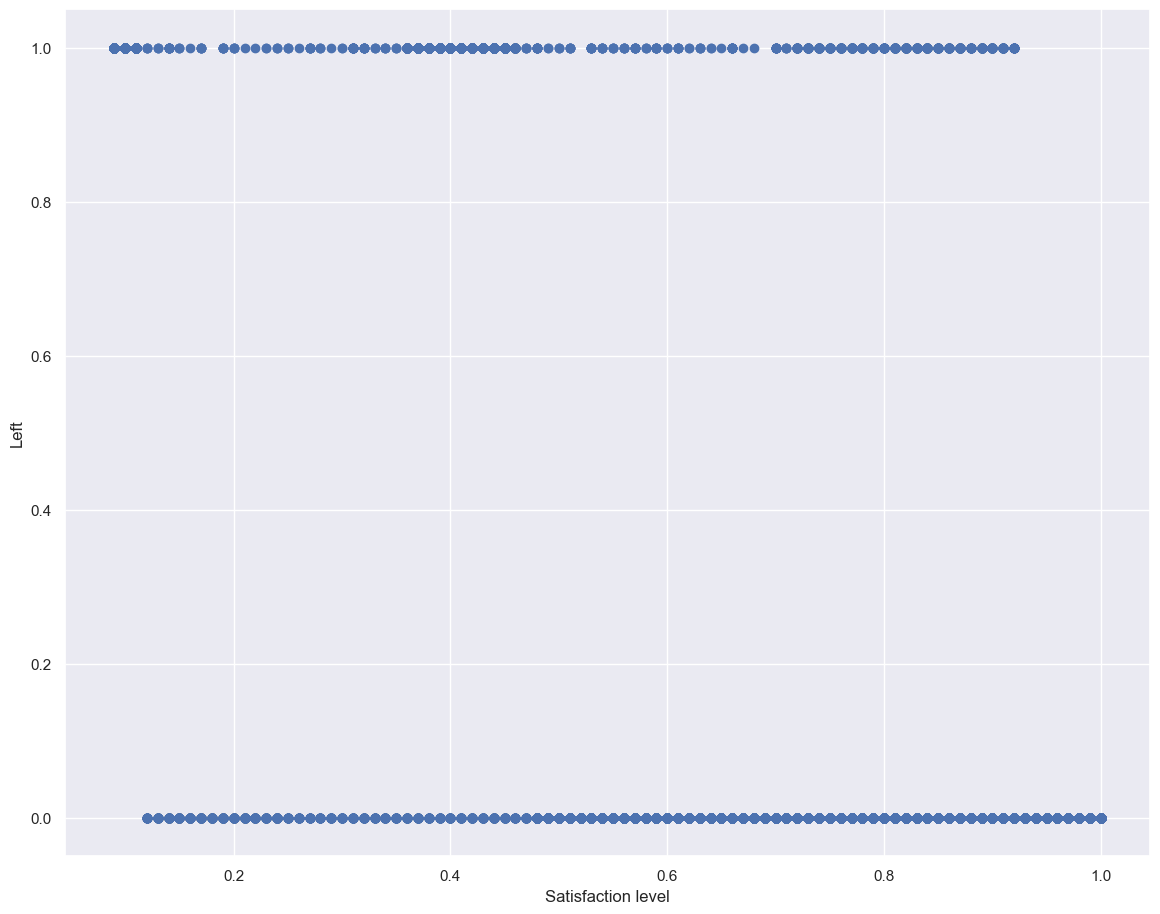

test predict satisfaction level 0.38, accuracy is: 0.08787994492002361


In [137]:
x = data["satisfaction_level"].values.reshape(-1, 1)
y = data["left"].values
def simple_machine_learning(x, y):
    x_train, x_test, y_train, y_test  = train_test_split(x, y, test_size=0.2, random_state=100000)
    model=LogisticRegression()
    model.fit(x_train, y_train)
    y_predicted = model.predict(x_test)
    for_left = [i for i in y_predicted if i > 0]
    for_stayed = [i for i in y_predicted if i == 0]
    all_predicts_len = len(y_predicted)
    going_to_leave = float(len(for_left))
    going_to_stay = float(len(for_stayed))
    ready_left = pd.DataFrame(for_left).rename(columns={0:"Left"})
    ready_stay = pd.DataFrame(for_stayed).rename(columns={0:"Stay"})
    for_viz = pd.concat([ready_left, ready_stay], axis=1)
    calculate_percentage_of_livers = going_to_leave/all_predicts_len*100
    calculate_percentage_of_stay = going_to_stay/all_predicts_len*100
    print(f"From the company is going to leave: {round(calculate_percentage_of_livers, 2)}%")
    print(f"In the company is going to stay: {round(calculate_percentage_of_stay, 2)}% ")
    print(f"accuracy of the predict: {model.score(x_test, y_test)}")
    plt.figure(figsize=(14, 11))
    plt.hist(ready_left)
    plt.hist(ready_stay)
    plt.title("Going to leave vs Going to Stay:")
    plt.legend(["left", "stay"])
    plt.show()
    coef = model.coef_
    inter = model.intercept_
    plt.figure(figsize=(14, 11))
    plt.scatter([i for i in x], [i for i in y])
    plt.xlabel("Satisfaction level")
    plt.ylabel("Left")
    plt.show()
simple_logistic_regression = simple_machine_learning(x, y)
simple_logistic_regression
def sigmoid_function(x):
    return 1/(1+np.exp(-x))
def prediction_function(satisfaction_level):
    z = (-3.71) * satisfaction_level - 0.93
    y = sigmoid_function(z)
    return y
satisfaction_level = 0.38
test_predict = prediction_function(satisfaction_level)
print(f"test predict satisfaction level 0.38, accuracy is: {test_predict}")

11.69% is going to leave from the company
88.31% is going to stay in the company
accuracy of the predict: 0.7733333333333333


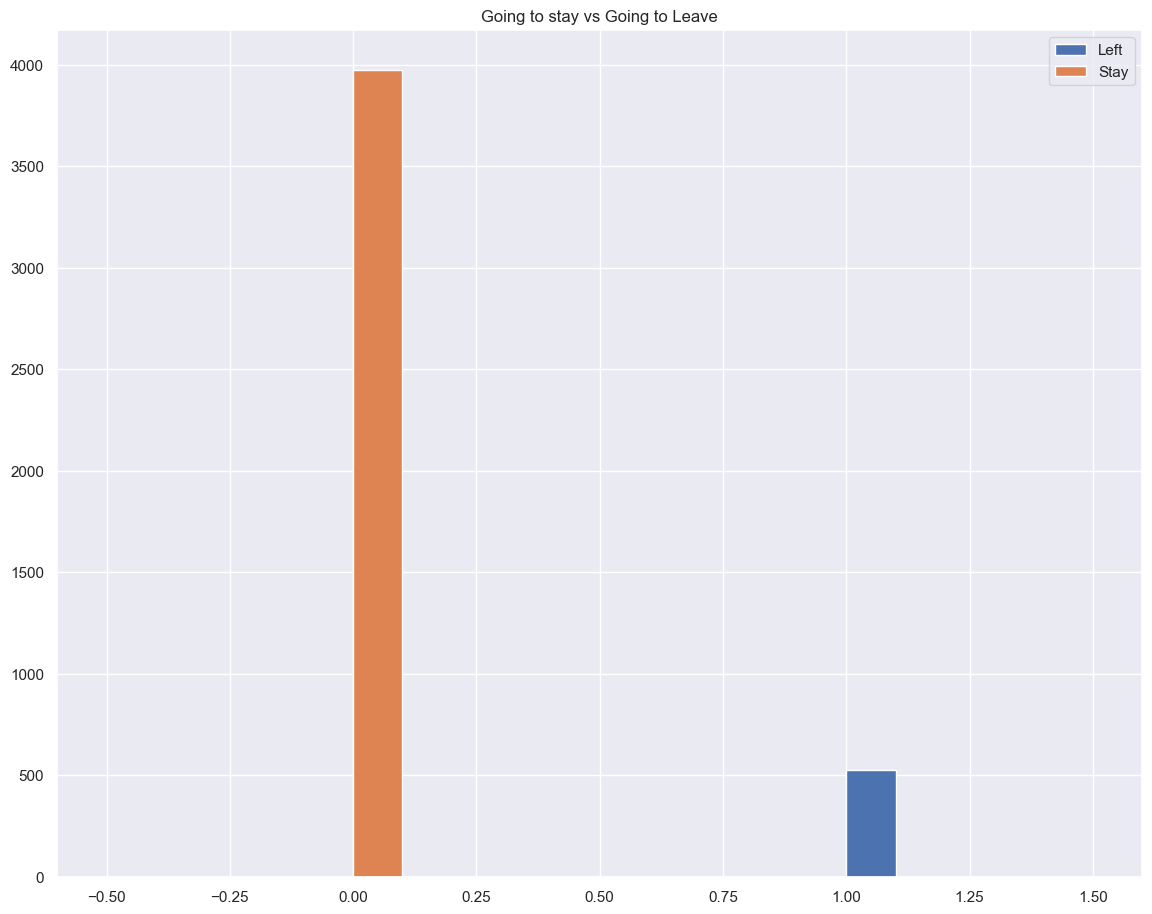

In [147]:
x = data[["satisfaction_level", "last_evaluation", "average_montly_hours", "time_spend_company", "Department"]]
re1 = pd.get_dummies(x["Department"], prefix="Department")
for_take = pd.concat([x, re1], axis=1).drop("Department", axis=1)
x = for_take
y = data["left"]
def multiple_machine_learning(x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1000)
    model = LogisticRegression()
    model.fit(x_train, y_train)
    y_predicted = model.predict(x_test)
    coef = model.coef_
    inter = model.intercept_
    for_take_leaves = len([i for i in y_predicted if i > 0])
    for_stayed = len([i for i in y_predicted if i == 0])
    read1 = pd.DataFrame([i for i in y_predicted if i > 0]).rename(columns={0:"going_to_left"})
    read2 = pd.DataFrame([i for i in y_predicted if 0 == i]).rename(columns={0:"going_to_stay"})
    count_percentage_leaves = for_take_leaves/len(y_predicted)*100
    count_percentage_stay = for_stayed/len(y_predicted)*100
    print(f"{round(count_percentage_leaves, 2)}% is going to leave from the company")
    print(f"{round(count_percentage_stay, 2)}% is going to stay in the company")
    print(f"accuracy of the predict: {model.score(x_test, y_test)}")
    plt.figure(figsize=(14, 11))
    plt.hist(read1)
    plt.hist(read2)
    plt.title("Going to stay vs Going to Leave")
    plt.legend(["Left", "Stay"])
    plt.show()
all_res = multiple_machine_learning(x, y)